# IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# LENDO OS DADOS

In [5]:
df = pd.read_csv('dados_demanda.csv',delimiter=';')
df.dropna(axis=1,inplace=True)
df.head(10)

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1
0,1,1,2008,0,0,"7,90000009536743"
1,1,1,2008,0,15,"7,69999980926514"
2,1,1,2008,0,30,"7,69999980926514"
3,1,1,2008,0,45,"7,40000009536743"
4,1,1,2008,1,0,"7,40000009536743"
5,1,1,2008,1,15,"7,40000009536743"
6,1,1,2008,1,30,"7,40000009536743"
7,1,1,2008,1,45,"7,19999980926514"
8,1,1,2008,2,0,"7,19999980926514"
9,1,1,2008,2,15,"7,30000019073486"


# SEPARANDO DADOS EM MÁXIMA SEMANAL E DIÁRIA

In [6]:
df['TEMPO'] = df[['DIA','MES','ANO','HORA','MINUTO']].apply(lambda x : datetime(year=x[2],month=x[1],day=x[0],hour=x[3],minute=x[4]), axis=1)
df.drop(['MINUTO','HORA','ANO','DIA','MES'],axis=1,inplace=True)
df.rename(columns={'JPS_12B1':'POTENCIA'},inplace=True)
df['POTENCIA']=df['POTENCIA'].str.replace(',', '.').astype(float)
df.set_index('TEMPO',inplace=True)


In [7]:
maxima_semanal=df.resample('W').agg(['max'])
maxima_diaria =df.resample('D').agg(['max'])

# PLOTANDO GRÁFICOS

Text(0.5, 1.0, 'Potência Máxima Semanal')

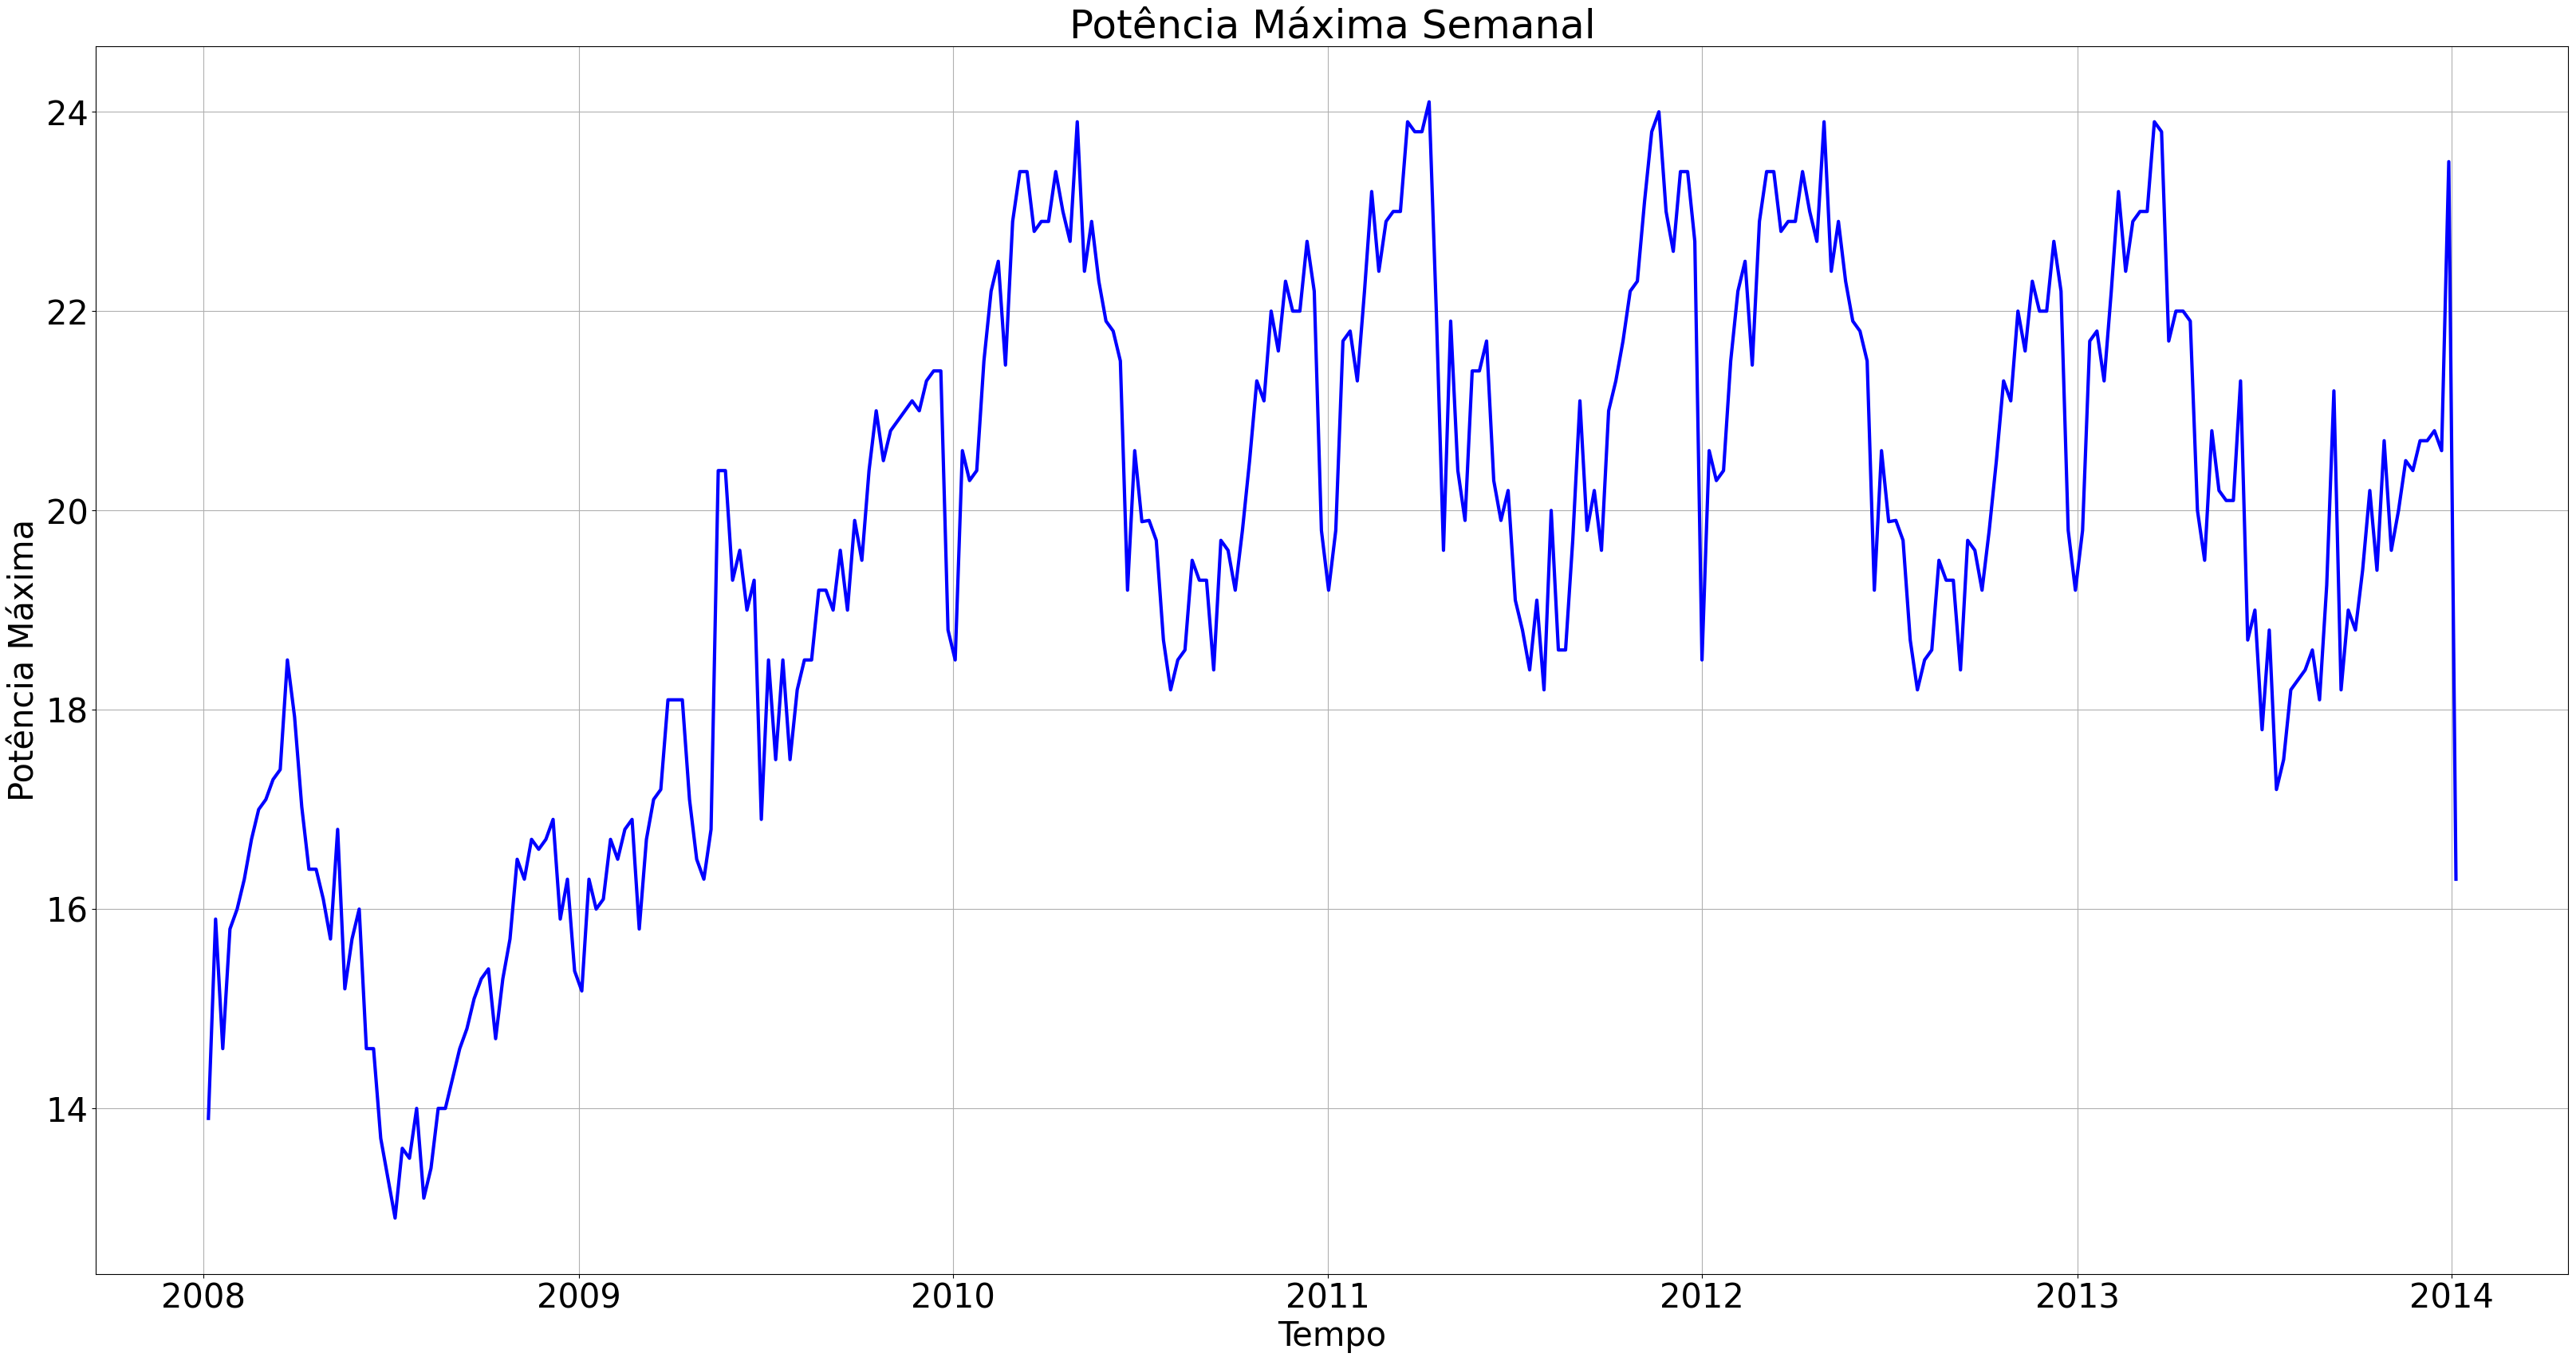

In [8]:
#Máximas semanais
plt.figure(figsize=(40,20),dpi=100)
plt.rc('font', size=30)
plt.grid(True)
plt.plot(maxima_semanal,lw=3,color='b')
plt.xlabel('Tempo')
plt.ylabel('Potência Máxima')
plt.title('Potência Máxima Semanal')

Text(0.5, 1.0, 'Potência Máxima Diária')

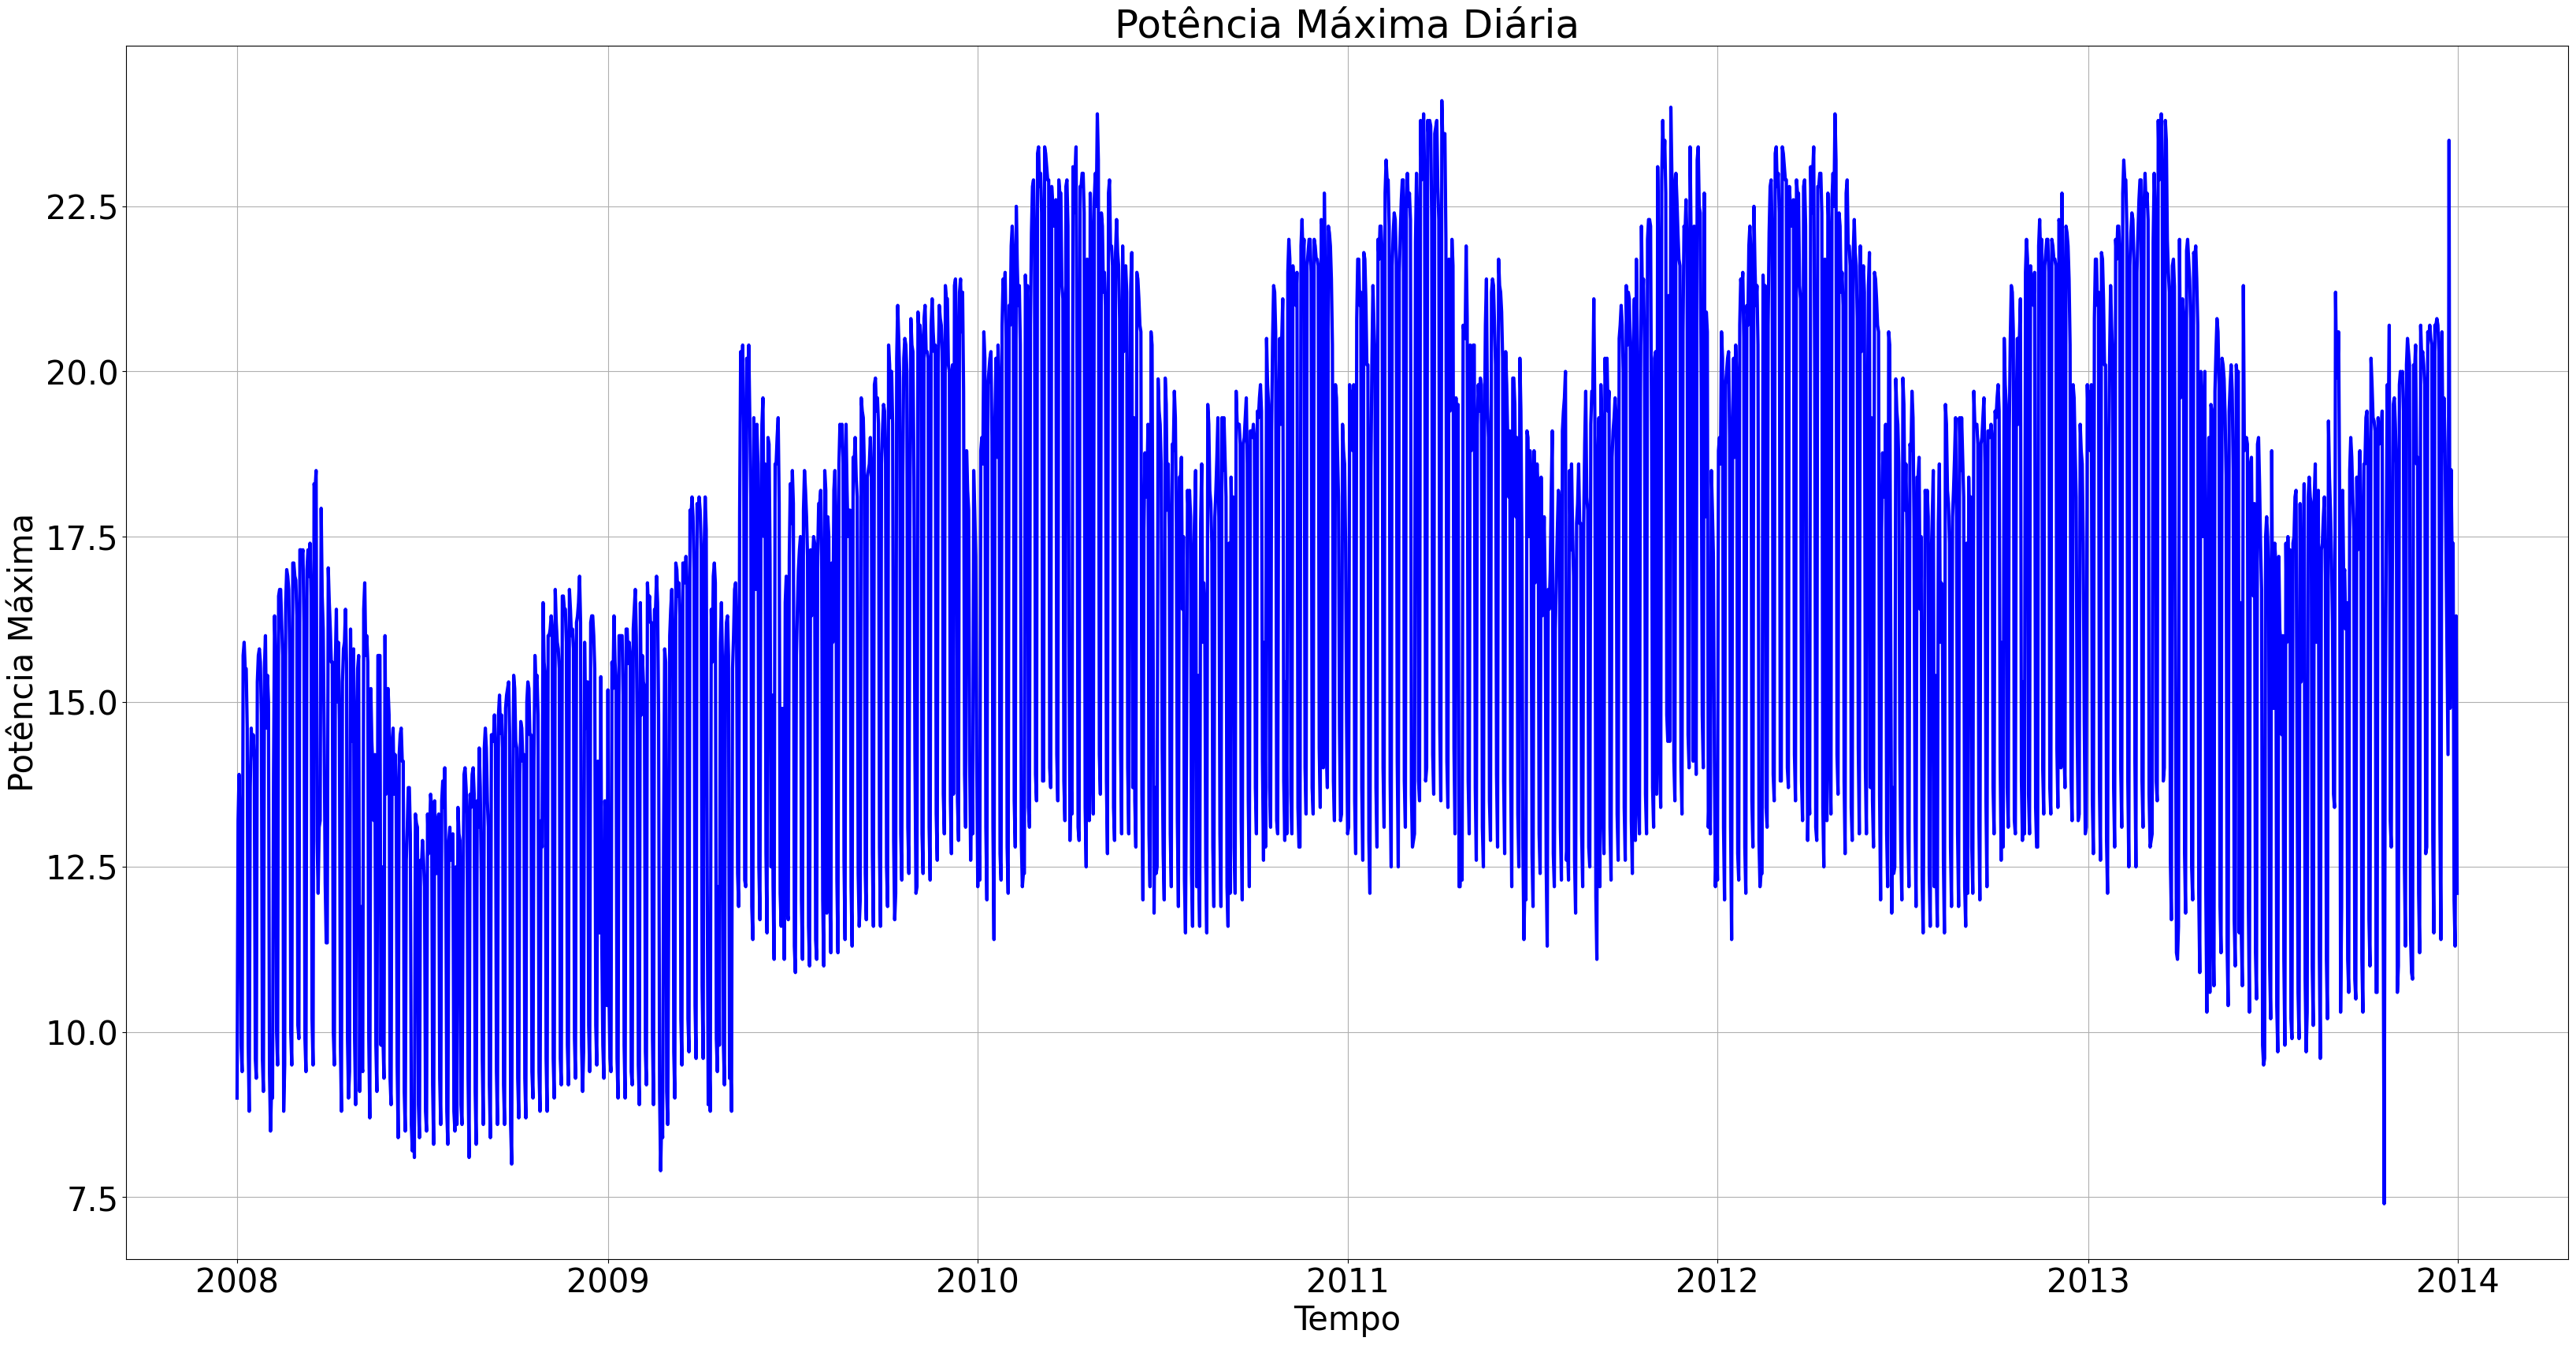

In [9]:
#Máximas diárias
plt.figure(figsize=(40,20),dpi=100)
plt.rc('font', size=30)
plt.grid(True)
plt.plot(maxima_diaria,lw=3,color='b')
plt.xlabel('Tempo')
plt.ylabel('Potência Máxima')
plt.title('Potência Máxima Diária')

# CRIANDO DADOS PARA SEREM UTILIZADOS NA REDE NEURAL

In [12]:
df.head(10)

,POTENCIA
TEMPO,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4
2008-01-01 01:15:00,7.4
2008-01-01 01:30:00,7.4
2008-01-01 01:45:00,7.2
2008-01-01 02:00:00,7.2


In [18]:
x1 = maxima_semanal
x2 = maxima_semanal.shift(1).rename(columns={'POTENCIA':'POTENCIA(K-1)'})
x3 = maxima_semanal.shift(2).rename(columns={'POTENCIA':'POTENCIA(K-2)'})
x4 = maxima_semanal.shift(3).rename(columns={'POTENCIA':'POTENCIA(K-3)'})
x5 = maxima_semanal.shift(4).rename(columns={'POTENCIA':'POTENCIA(K-4)'})

y1 = x1.shift(-1).rename(columns={'POTENCIA':'POTENCIA(K+1)'})
y2 = x1.shift(-2).rename(columns={'POTENCIA':'POTENCIA(K+2)'})

data = pd.concat([x1,x2,x3,x4,x5,y1,y2],axis=1).dropna(axis=0)
data



,POTENCIA,POTENCIA(K-1),POTENCIA(K-2),POTENCIA(K-3),POTENCIA(K-4),POTENCIA(K+1),POTENCIA(K+2)
,max,max,max,max,max,max,max
TEMPO,,,,,,,
2008-02-03,16.000000,15.800000,14.600000,15.900000,13.900000,16.299999,16.700001
2008-02-10,16.299999,16.000000,15.800000,14.600000,15.900000,16.700001,17.000000
2008-02-17,16.700001,16.299999,16.000000,15.800000,14.600000,17.000000,17.100000
2008-02-24,17.000000,16.700001,16.299999,16.000000,15.800000,17.100000,17.299999
2008-03-02,17.100000,17.000000,16.700001,16.299999,16.000000,17.299999,17.400000
...,...,...,...,...,...,...,...
2013-11-24,20.400000,20.500000,20.000000,19.600000,20.700001,20.700001,20.700001
2013-12-01,20.700001,20.400000,20.500000,20.000000,19.600000,20.700001,20.799999


plt.xlim([maxima_semanal['POTENCIA'][0],maxima_semanal['POTENCIA'][len(maxima_semanal)]])